In [ ]:
import numpy as np  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kag_risk_factors_cervical_cancer.csv to kag_risk_factors_cervical_cancer.csv


In [ ]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['kag_risk_factors_cervical_cancer.csv']))
print(df)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [ ]:
for feature in df.columns:
    df[feature].replace('?',np.nan,inplace=True )
    df[feature].fillna(value=0,inplace=True)
for feature in df.columns:
    df[feature].replace(0,df[feature].median(),inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
df['Number of sexual partners'] = df['Number of sexual partners'].astype(str)
df['Biopsy'] = df['Biopsy'].astype(str)

In [ ]:
x=df[['Number of sexual partners','Biopsy']].values
x

array([['4.0', '0'],
       ['1.0', '0'],
       ['1.0', '0'],
       ...,
       ['2.0', '0'],
       ['2.0', '0'],
       ['2.0', '0']], dtype=object)

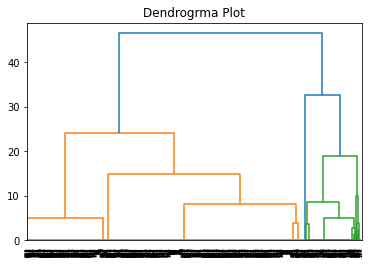

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  

mtp.show()  

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  
y_pred


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

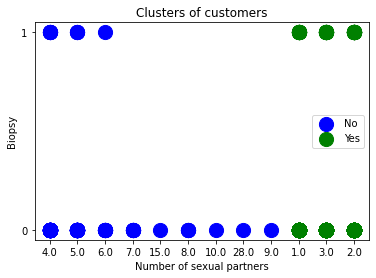

In [ ]:
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 200, c = 'blue', label = 'No')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 200, c = 'green', label = 'Yes')  

mtp.title('Clusters of customers')  
mtp.xlabel('Number of sexual partners')  
mtp.ylabel('Biopsy')  
mtp.legend()  
mtp.show()  



---



TRAIL 2



In [ ]:
df['Num of pregnancies'] = df['Num of pregnancies'].astype(str)
df['Biopsy'] = df['Biopsy'].astype(str)
x1=df[['Num of pregnancies','Biopsy']].values
x1

array([['1.0', '0'],
       ['1.0', '0'],
       ['1.0', '0'],
       ...,
       ['0.0', '0'],
       ['2.0', '0'],
       ['1.0', '0']], dtype=object)

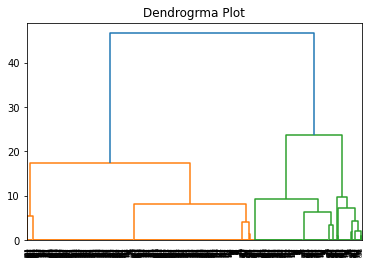

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x1, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.show()  

In [ ]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x1)  
y_pred



array([0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,

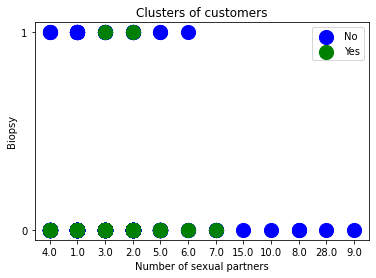

In [ ]:
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 200, c = 'blue', label = 'No')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 200, c = 'green', label = 'Yes')  

mtp.title('Clusters of customers')  
mtp.xlabel('Number of sexual partners')  
mtp.ylabel('Biopsy')  
mtp.legend()  
mtp.show()  



---



**Hierarchical Clustering: Advantages and Disadvantages**



Advantages	
• Hierarchical	clustering	outputs	a	hierarchy,	ie	a	structure	that	is	more	informaHve	than	
the	unstructured	set	of	flat	clusters	returned	by	k-means.	Therefore,	it	is	easier	to	decide	
on	the	number	of	clusters	by	looking	at	the	dendrogram	(see	suggesHon	on	how	to	cut	a	
dendrogram	in	lab8).	
• Easy	to	implement	
Disavantages	
• It	is	not	possible	to	undo	the	previous	step:	once	the	instances	have	been	assigned	to	a	
cluster,	they	can	no	longer	be	moved	around.		
• Time	complexity:	not	suitable	for	large	datasets	
• IniHal	seeds	have	a	strong	impact	on	the	final	results	
• The	order	of	the	data	has	an	impact	on	the	final	results	
• Very	sensiHve	to	outliers

Let us find the count of cancer affected person with respect to four kind of tests.

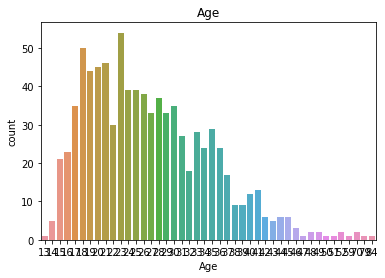

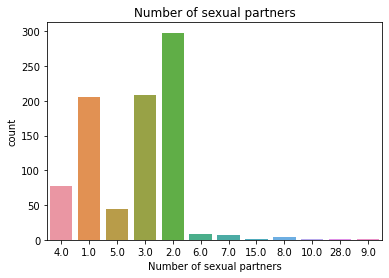

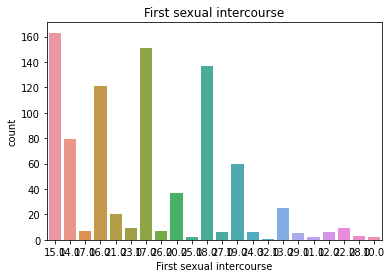

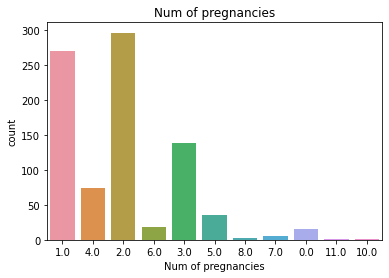

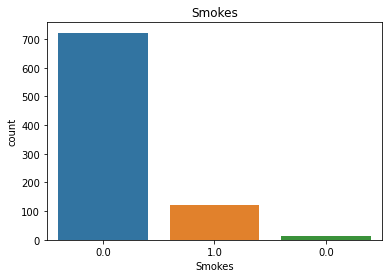

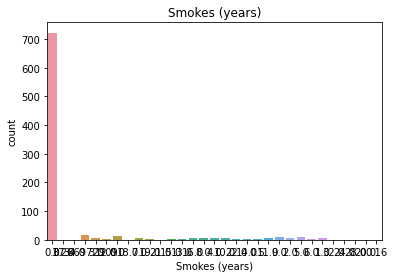

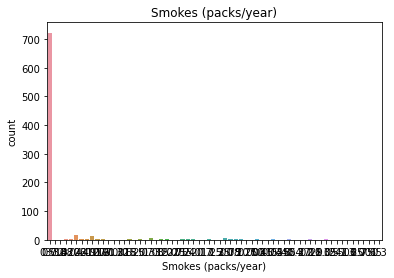

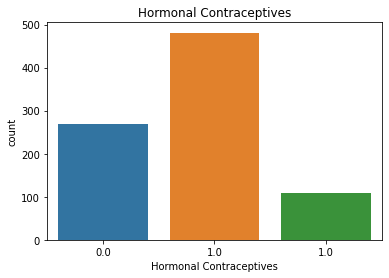

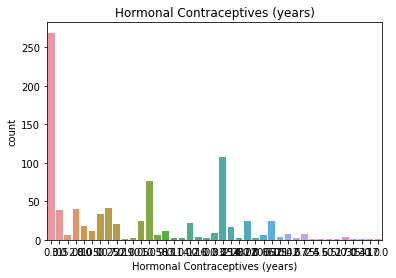

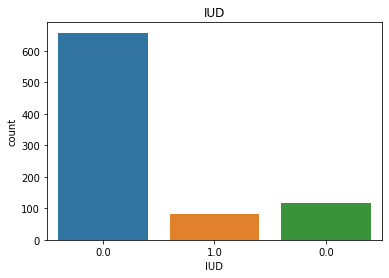

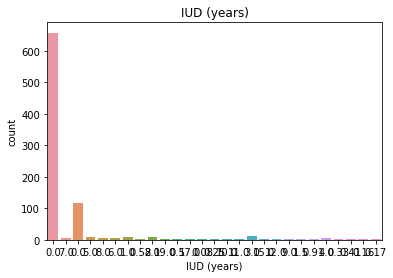

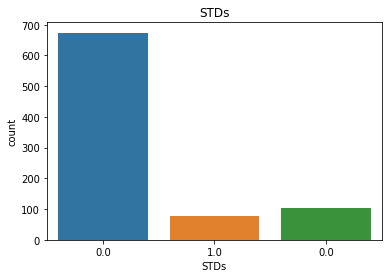

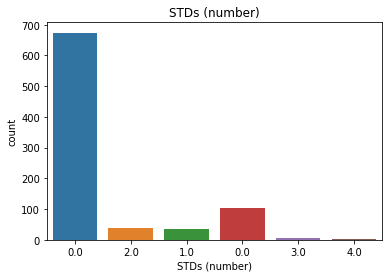

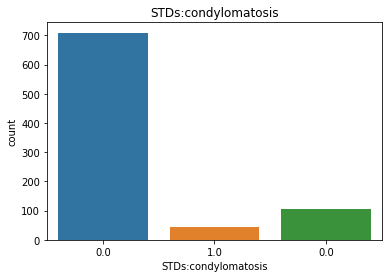

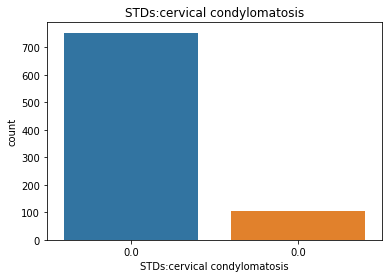

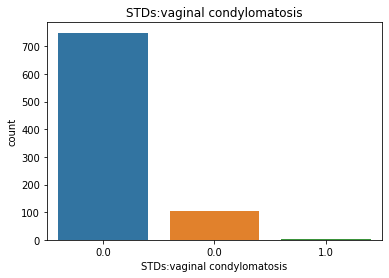

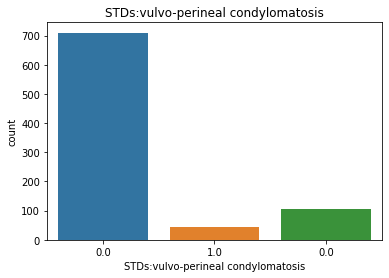

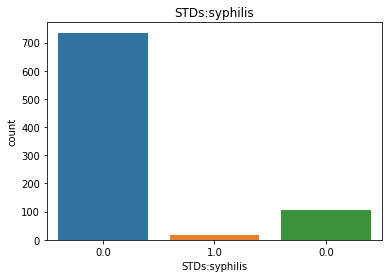

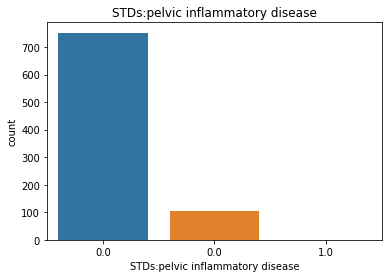

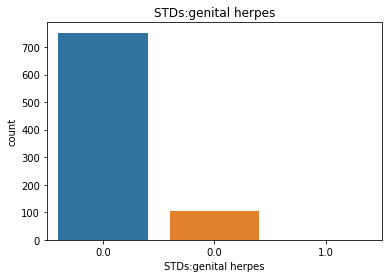

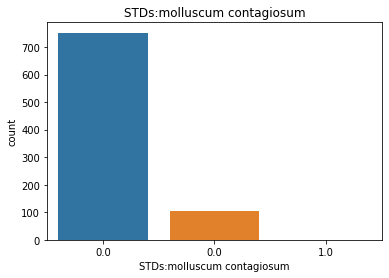

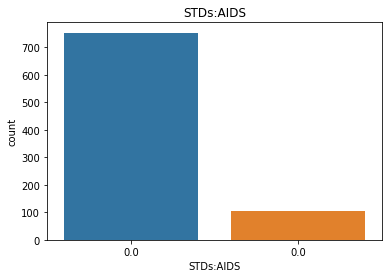

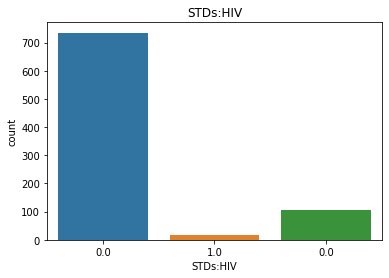

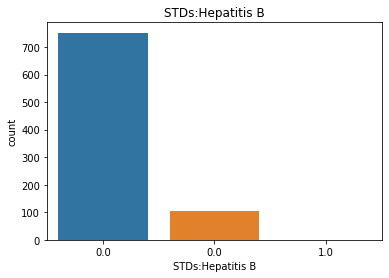

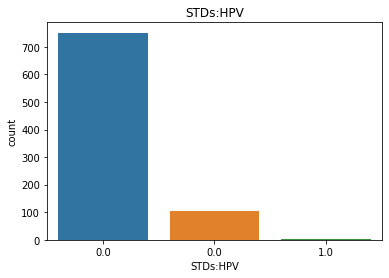

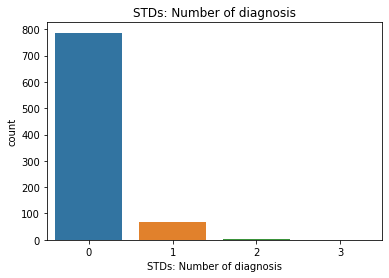

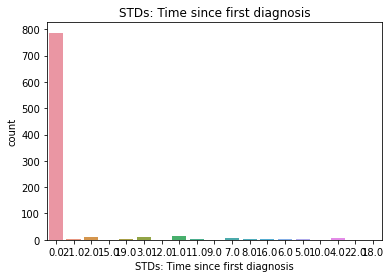

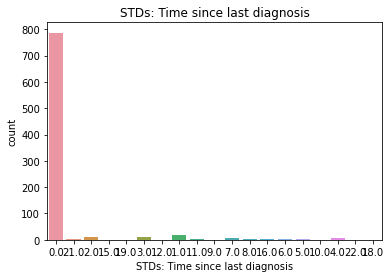

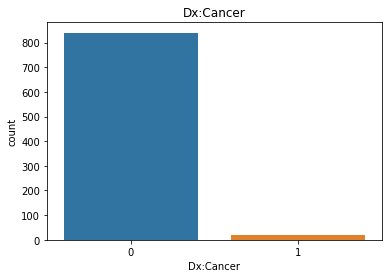

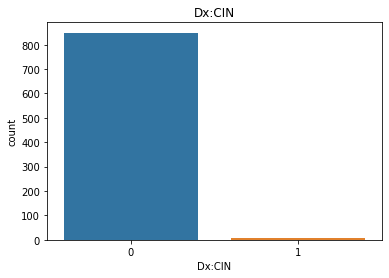

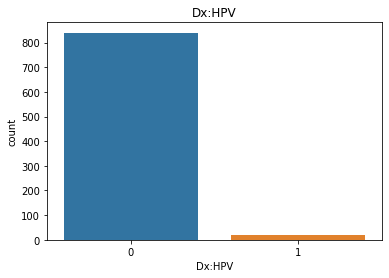

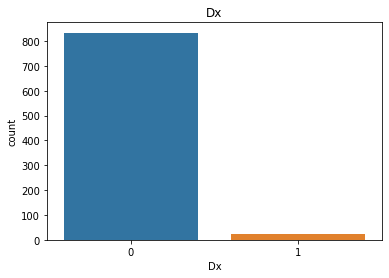

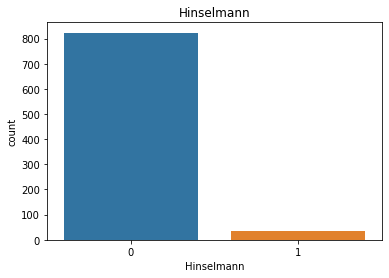

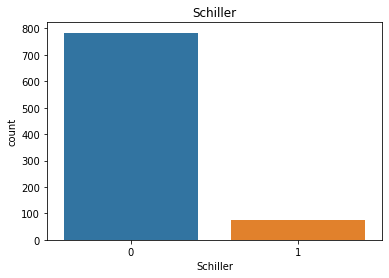

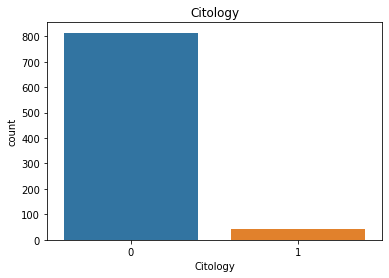

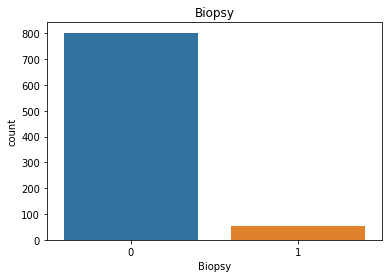

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for features in df.columns:
    s=df.copy()
    sns.countplot(x=s[features])
    plt.xlabel(features)
    plt.title(features)
    plt.show()
    